# Project: Analysis of Iris Species Data

## Analysis Objective

The purpose of this data analysis report is to analyze the attribute data of two types of iris flowers, specifically the mean values of sepal and petal length and width, to determine whether there are significant differences. This allows us to infer the characteristic features of different iris species.

## Introduction

The raw data `Iris.csv` includes two types of iris flowers, each with 50 samples, and several attributes for each sample, including sepal length and width, petal length and width.

The meaning of each column in `Iris.csv` is as follows:
- Id: Sample ID.
- SepalLengthCm: Sepal length (in centimeters).
- SepalWidthCm: Sepal width (in centimeters).
- PetalLengthCm: Petal length (in centimeters).
- PetalWidthCm: Petal width (in centimeters).
- Species: Iris species.

## Load Data

Import the necessary libraries for data analysis, and use Pandas' `read_csv` function to parse the contents of the raw data file `Iris.csv` into a DataFrame, assigning it to the variable `original_data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Iris.csv")

In [3]:
original_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Assess and Clean Data

In this section, we will assess and clean the data contained in the `original_data` DataFrame established in the previous section.

We focus on two aspects: structure and content, i.e., tidiness and cleanliness.

Structural issues refer to not meeting the three standards: each variable is a column, each observation is a row, and each type of observational unit is a table. Content issues include missing data, duplicate data, invalid data, etc.

To distinguish between cleaned and raw data, we create a new variable `cleaned_data` as a copy of `original_data`. All subsequent cleaning steps will be applied to `cleaned_data`.

In [4]:
cleaned_data = original_data.copy()

### Data Tidiness

In [5]:
cleaned_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


From the first 10 rows, the data meets the standards: each variable is a column, each observation is a row, and each type of observational unit is a table. Therefore, there are no structural issues.

### Data Cleanliness

Next, use `info` to get a general understanding of the data content.

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


From the output, `cleaned_data` contains 100 observations and no missing values.

`Id` represents the sample ID and should be a string, not a number, so we need to convert its data type.

In [7]:
cleaned_data["Id"] = cleaned_data["Id"].astype("str")
cleaned_data["Id"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

#### Handling Missing Data

From the output of the `info` method, there are no missing values in `cleaned_data`, so no action is needed for missing data.

#### Handling Duplicate Data

According to the meaning and content of the variables, the `Id` in `cleaned_data` is the unique identifier for each sample and should not be duplicated. Let's check for duplicates.

In [8]:
cleaned_data["Id"].duplicated().sum()

np.int64(0)

The output is 0, indicating no duplicate values.

#### Handling Inconsistent Data

Inconsistent data may exist in the `Species` variable. We need to check if there are multiple values referring to the same iris species.

In [9]:
cleaned_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

From the output above, `Species` has only two possible values, `Iris-versicolor` and `Iris-setosa`, so there is no inconsistent data.

We can convert this column to `Category` type, which is more memory-efficient than string type and indicates that the values are limited.

In [10]:
cleaned_data["Species"] = cleaned_data["Species"].astype("category")
cleaned_data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### Handling Invalid or Erroneous Data

We can use the DataFrame's `describe` method to quickly understand the statistical information of the numerical values.

In [11]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


From the statistical information above, there are no unrealistic values in `cleaned_data`.

## Organize Data

Data organization is closely related to the analysis direction. The goal of this analysis is to determine whether there are significant differences in the mean values of sepal and petal length and width between two iris species.

Therefore, we can filter the sample data for each iris species based on the `Species` column.

In [12]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
len(iris_setosa)

50

In [14]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [15]:
len(iris_versicolor)

50

## Explore Data

Before conducting inferential statistical analysis, we can use data visualization to explore the characteristics of the variables for Setosa and Versicolor.

Visualization helps us gain a more intuitive understanding of the data, such as the distribution and relationships between variables, which can guide further analysis.

For numerical values, we can directly plot pair plots, use density plots to view the distribution of different variables, and scatter plots to understand relationships between variables.

Since the purpose of this analysis is to determine whether there are differences in the attribute characteristics of different iris species, we can use color to distinguish samples of different species in the charts.

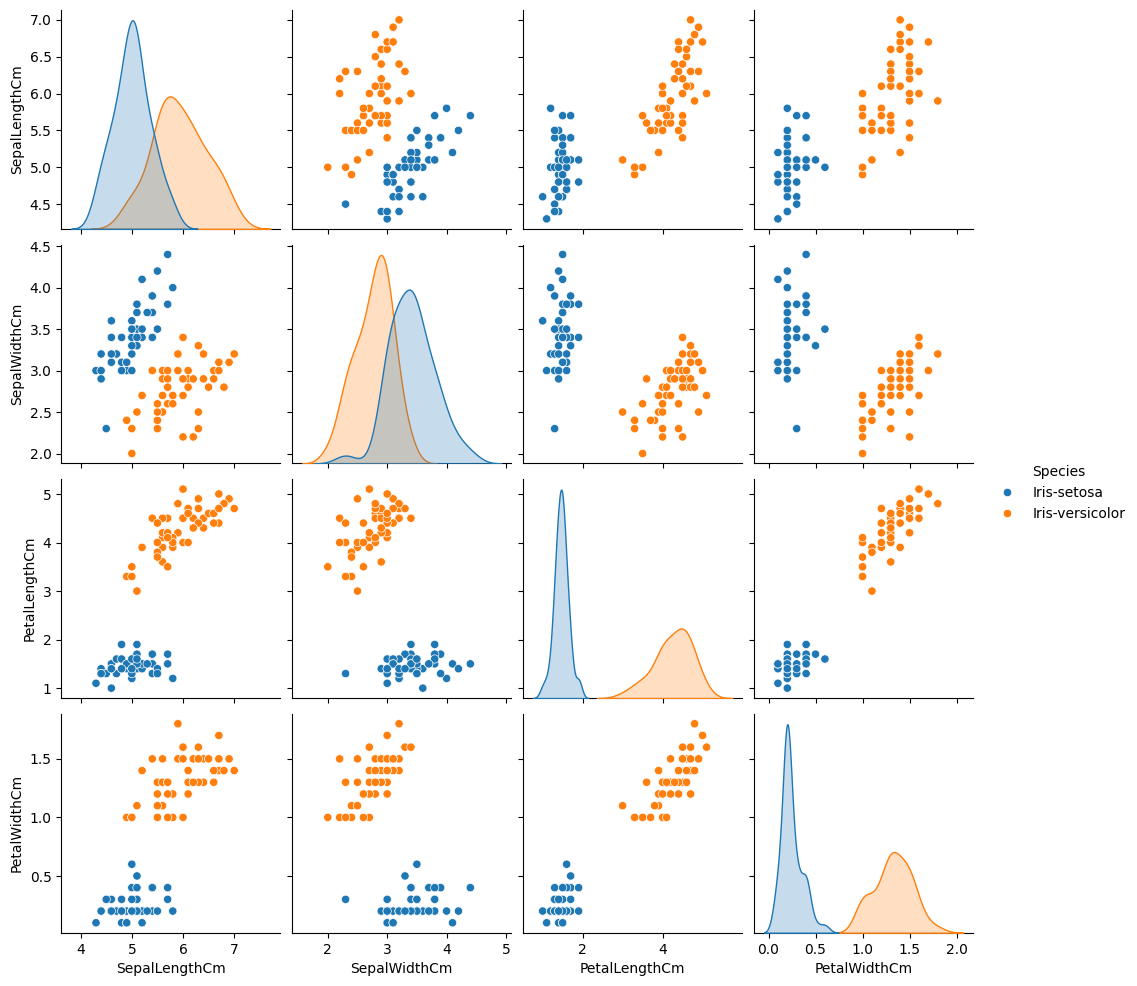

In [16]:
sns.pairplot(cleaned_data, hue="Species")
plt.show()

From the above, the distributions of petal length and width for Setosa and Versicolor samples show obvious numerical differences, suggesting that the hypothesis test will likely find significant differences in petal length and width.

Sepal length and width distributions overlap, so we cannot draw conclusions from the charts alone and need hypothesis testing to infer whether there are differences in sepal length and width.

## Analyze Data

We will use hypothesis testing to examine whether there are statistically significant differences in the mean values of sepal and petal length and width between Setosa and Versicolor.

Since we only have sample data and do not know the population standard deviation, and each group has 50 samples (not a large sample size), we use the t-test instead of the z-test. Assume the dataset meets the two prerequisites for the t-test: random sampling and normal distribution.

First, import the module required for the t-test.

In [17]:
from scipy.stats import ttest_ind

### Analyze Sepal Length

The distribution of sepal length for Setosa and Versicolor is as follows.

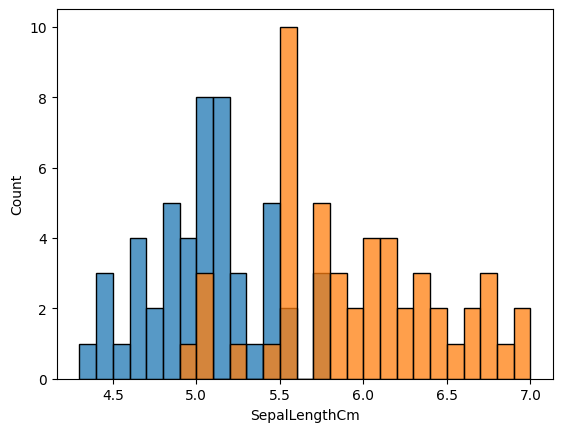

In [18]:
sns.histplot(iris_setosa['SepalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['SepalLengthCm'], binwidth=0.1)
plt.show()

#### Formulate Hypotheses

$H_0$: The mean sepal length of Setosa and Versicolor iris flowers is not significantly different.

$H_1$: The mean sepal length of Setosa and Versicolor iris flowers is significantly different.

#### One-tailed or Two-tailed Test

Since we only test whether the means are different, not which species has longer sepals, it is a two-tailed test.

#### Determine Significance Level

We choose 0.05 as the significance level.

#### Calculate t-value and p-value

In [19]:
t_stat, p_value = ttest_ind(iris_setosa["SepalLengthCm"], iris_versicolor["SepalLengthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-10.52098626754911
p值：8.985235037487079e-18


#### Conclusion

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that the mean sepal length of Setosa and Versicolor iris flowers is significantly different.

### Analyze Sepal Width

The distribution of sepal width for Setosa and Versicolor is as follows.

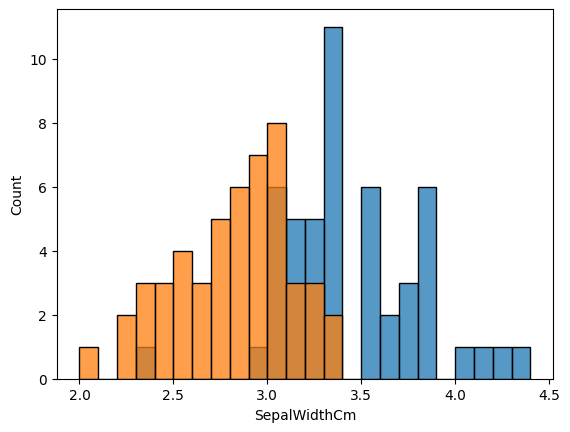

In [20]:
sns.histplot(iris_setosa['SepalWidthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['SepalWidthCm'], binwidth=0.1)
plt.show()

#### Formulate Hypotheses

$H_0$: The mean sepal width of Setosa and Versicolor iris flowers is not significantly different.

$H_1$: The mean sepal width of Setosa and Versicolor iris flowers is significantly different.

#### One-tailed or Two-tailed Test

Since we only test whether the means are different, not which species has wider sepals, it is a two-tailed test.

#### Determine Significance Level

We choose 0.05 as the significance level.

#### Calculate t-value and p-value

In [21]:
t_stat, p_value = ttest_ind(iris_setosa["SepalWidthCm"], iris_versicolor["SepalWidthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：9.282772555558111
p值：4.362239016010215e-15


#### Conclusion

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that the mean sepal width of Setosa and Versicolor iris flowers is significantly different.

### Analyze Petal Length

The distribution of petal length for Setosa and Versicolor is as follows.

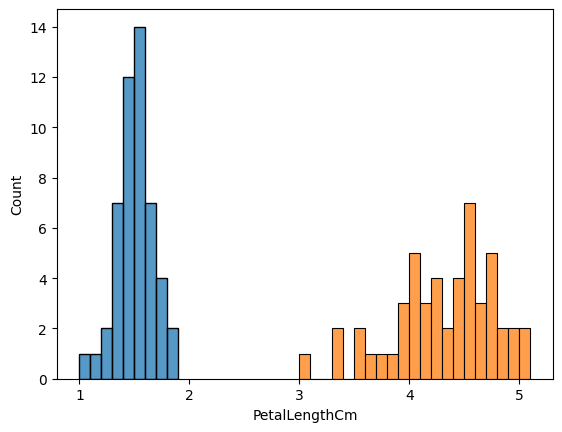

In [22]:
sns.histplot(iris_setosa['PetalLengthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalLengthCm'], binwidth=0.1)
plt.show()

#### Formulate Hypotheses

$H_0$: The mean petal length of Setosa and Versicolor iris flowers is not significantly different.

$H_1$: The mean petal length of Setosa and Versicolor iris flowers is significantly different.

#### One-tailed or Two-tailed Test

Since we only test whether the means are different, not which species has longer petals, it is a two-tailed test.

#### Determine Significance Level

We choose 0.05 as the significance level.

#### Calculate t-value and p-value

In [23]:
t_stat, p_value = ttest_ind(iris_setosa["PetalLengthCm"], iris_versicolor["PetalLengthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-39.46866259397272
p值：5.717463758170621e-62


#### Conclusion

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that the mean petal length of Setosa and Versicolor iris flowers is significantly different.

### Analyze Petal Width

The distribution of petal width for Setosa and Versicolor is as follows.

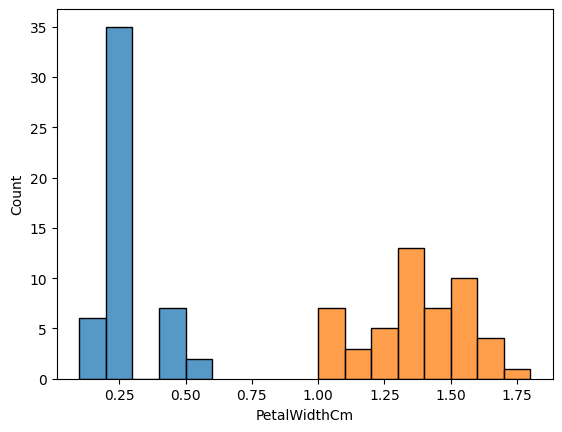

In [24]:
sns.histplot(iris_setosa['PetalWidthCm'], binwidth=0.1)
sns.histplot(iris_versicolor['PetalWidthCm'], binwidth=0.1)
plt.show()

#### Formulate Hypotheses

$H_0$: The mean petal width of Setosa and Versicolor iris flowers is not significantly different.

$H_1$: The mean petal width of Setosa and Versicolor iris flowers is significantly different.

#### One-tailed or Two-tailed Test

Since we only test whether the means are different, not which species has wider petals, it is a two-tailed test.

#### Determine Significance Level

We choose 0.05 as the significance level.

#### Calculate t-value and p-value

In [25]:
t_stat, p_value = ttest_ind(iris_setosa["PetalWidthCm"], iris_versicolor["PetalWidthCm"])
print(f"t值：{t_stat}")
print(f"p值：{p_value}")

t值：-34.01237858829048
p值：4.589080615710866e-56


#### Conclusion

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, indicating that the mean petal width of Setosa and Versicolor iris flowers is significantly different.

## Conclusion

Through the process of inferential statistics, we found that the mean values of sepal and petal length and width for Setosa and Versicolor iris flowers all show statistically significant differences.